In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE


Считать в pandas.DataFrame любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.

In [150]:
df = pd.read_csv('../datasets/Score.csv')
df

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
0,3.0,7.0,4.0,26.822620,265.0,No,80.415295,312.494089,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
1,3.0,7.0,4.0,31.944960,265.0,No,118.280222,284.629162,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
2,3.0,7.0,4.0,28.609352,267.0,No,81.699521,331.209863,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
3,5.0,4.0,4.0,31.377862,268.0,No,199.458074,223.451310,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
4,6.0,4.0,4.0,24.797347,269.0,No,41.420153,341.489231,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87949,23.0,7.0,3.0,34.663572,378.0,No,60.971333,479.866228,Poor,Good,...,25.0,39628.99,4.0,6.0,7.0,2.0,3359.415833,11.50,502.38,35.104023
87950,18.0,7.0,3.0,40.565631,379.0,No,54.185950,496.651610,Poor,Good,...,25.0,39628.99,4.0,6.0,7.0,2.0,3359.415833,11.50,502.38,35.104023
87951,27.0,6.0,3.0,41.255522,380.0,No,24.028477,516.809083,Poor,Good,...,25.0,39628.99,4.0,6.0,7.0,2.0,3359.415833,11.50,502.38,35.104023
87952,20.0,6.0,3.0,33.638208,381.0,No,251.672582,319.164979,Standard,Good,...,25.0,39628.99,4.0,6.0,7.0,2.0,3359.415833,11.50,502.38,35.104023


Привести описание датасета.

Данный датасет содержит информацию о кредитной истории и финансовом поведении клиентов. Он включает в себя различные признаки, связанные с кредитными платежами, задолженностями, кредитным рейтингом и демографическими данными.
| Признак                  | Описание                                                    | Тип данных     |
|--------------------------|-------------------------------------------------------------|----------------|
| Delay_from_due_date      | Количество дней задержки платежа от установленного срока    | float          |
| Num_of_Delayed_Payment   | Общее количество просроченных платежей у клиента            | float          |
| Num_Credit_Inquiries     | Количество запросов в кредитную историю за последний период | float          |
| Credit_Utilization_Ratio | Процент использования доступного кредитного лимита          | float          |
| Credit_History_Age       | Возраст кредитной истории в месяцах                         | float          |
| Payment_of_Min_Amount    | Привычка клиента оплачивать только минимальный платёж       | Категориальный |
| Amount_invested_monthly  | Сумма, которую клиент регулярно инвестирует                 | float          |
| Monthly_Balance          | Среднемесячный остаток средств на счетах                    | float          |
| Credit_Score             | Кредитный рейтинг                                           | Категориальный |
| Credit_Mix               | Тип кредитного портфеля                                     | Категориальный |
| Payment_Behaviour        | Шаблон поведения при платежах                               | Категориальный |
| Age                      | Возраст клиента                                             | float          |
| Annual_Income            | Годовой доход в денежных единицах                           | float          |
| Num_Bank_Accounts        | Количество открытых банковских счетов                       | float          |
| Num_Credit_Card          | Количество имеющихся кредитных карт                         | float          |
| Interest_Rate            | Процентная ставка по основному кредиту                      | float          |
| Num_of_Loan              | Количество активных кредитов                                | float          |
| Monthly_Inhand_Salary    | Чистая ежемесячная зарплата                                 | float          |
| Changed_Credit_Limit     | Изменение кредитного лимита за последний период             | float          |
| Outstanding_Debt         | Текущая сумма непогашенного долга                           | float          |
| Total_EMI_per_month      | Общая сумма ежемесячных платежей по кредитам                | float          |

Target-переменная: Credit_Score (категориальная, но для регрессии можно преобразовать в числовые значения)

Осуществить предобработку данных (избавиться от null, убрать некоторые признаки и т.п.) - "подчистить данные".

In [151]:
df = df.drop_duplicates()
df = df.dropna()
df.isnull().sum()

Delay_from_due_date         0
Num_of_Delayed_Payment      0
Num_Credit_Inquiries        0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Amount_invested_monthly     0
Monthly_Balance             0
Credit_Score                0
Credit_Mix                  0
Payment_Behaviour           0
Age                         0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Monthly_Inhand_Salary       0
Changed_Credit_Limit        0
Outstanding_Debt            0
Total_EMI_per_month         0
dtype: int64

Нормализовать численные данные.

In [152]:
credit_score_map = {'Poor': 0, 'Standard': 1, 'Good': 2}
df['Credit_Score_Num'] = df['Credit_Score'].map(credit_score_map)
target = 'Credit_Score_Num'

# Разделение на количественные и категориальные признаки
quant_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
quant_features.remove(target)  # Убираем target из признаков
cat_features = df.select_dtypes(include=['object']).columns.tolist()
scaler = StandardScaler()
df[quant_features] = scaler.fit_transform(df[quant_features])


Визуализировать heatmap-матрицу кореллированности признаков.

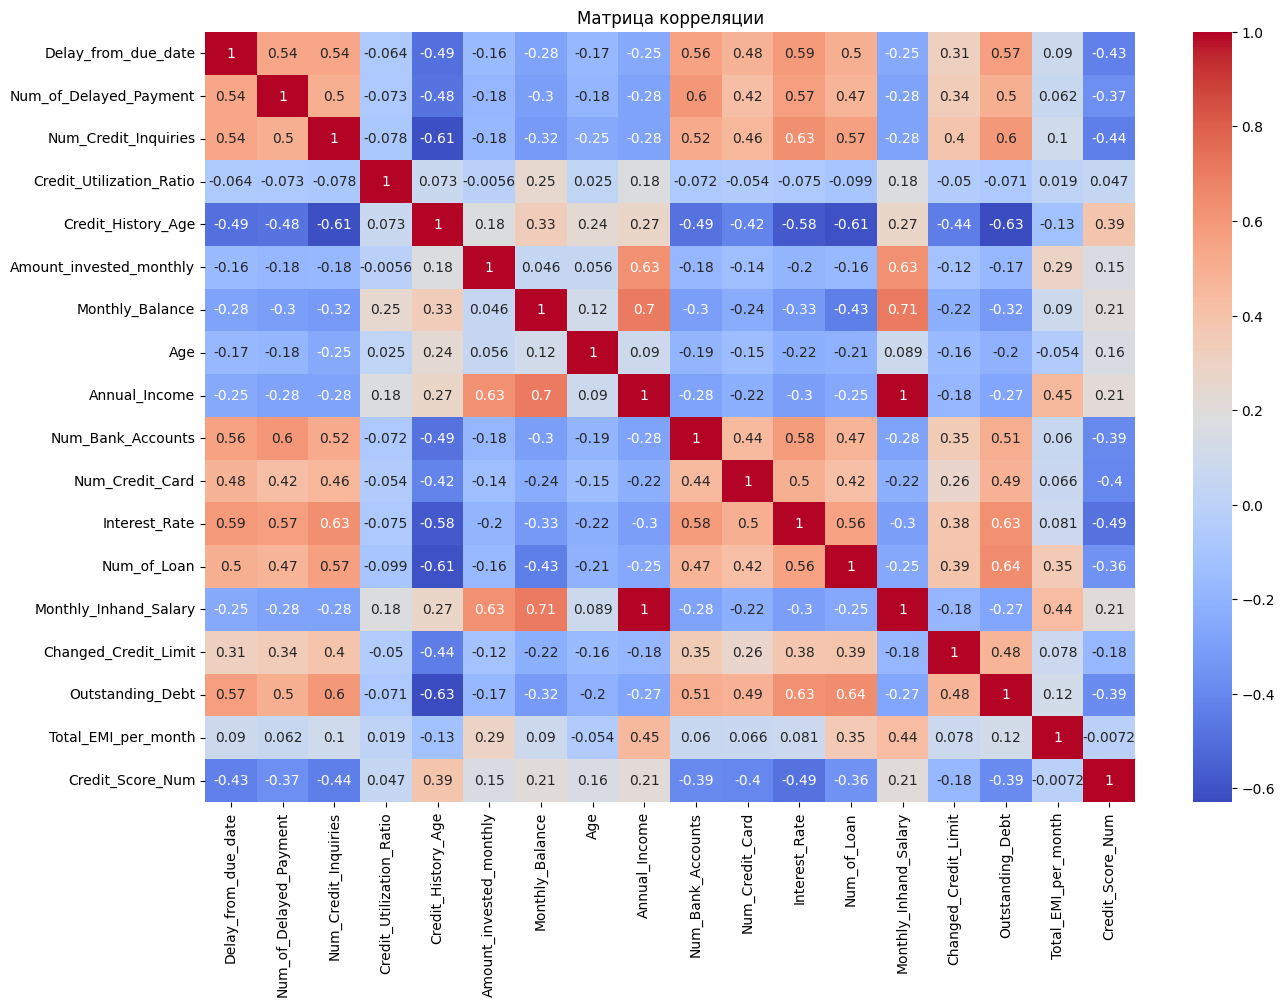

In [153]:
plt.figure(figsize=(15, 10))
sns.heatmap(df[quant_features + [target]].corr(), annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

Визуализировать взаимосвязь между target-переменной и каждым из признаком (с использованием srs.pairplot или pandas.plotting.scatter_matrix). Лучше всего построить диаграмму попарного распределения между таргетом и каждым из признаков отдельно (пример с sns.FacetGrid в лекции).

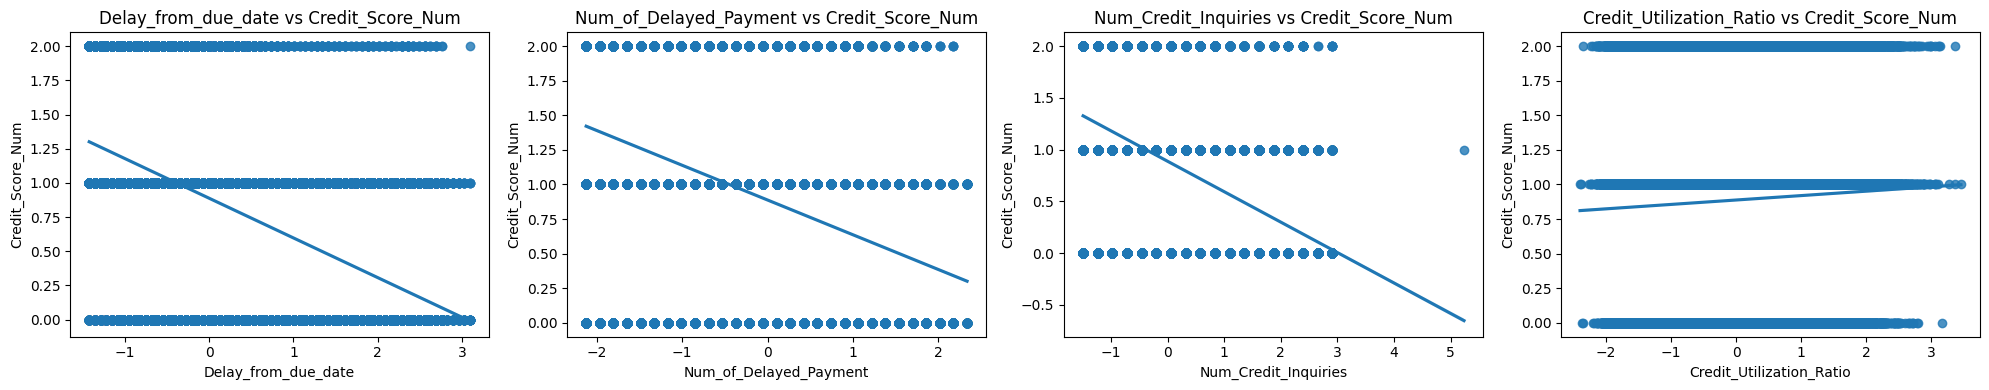

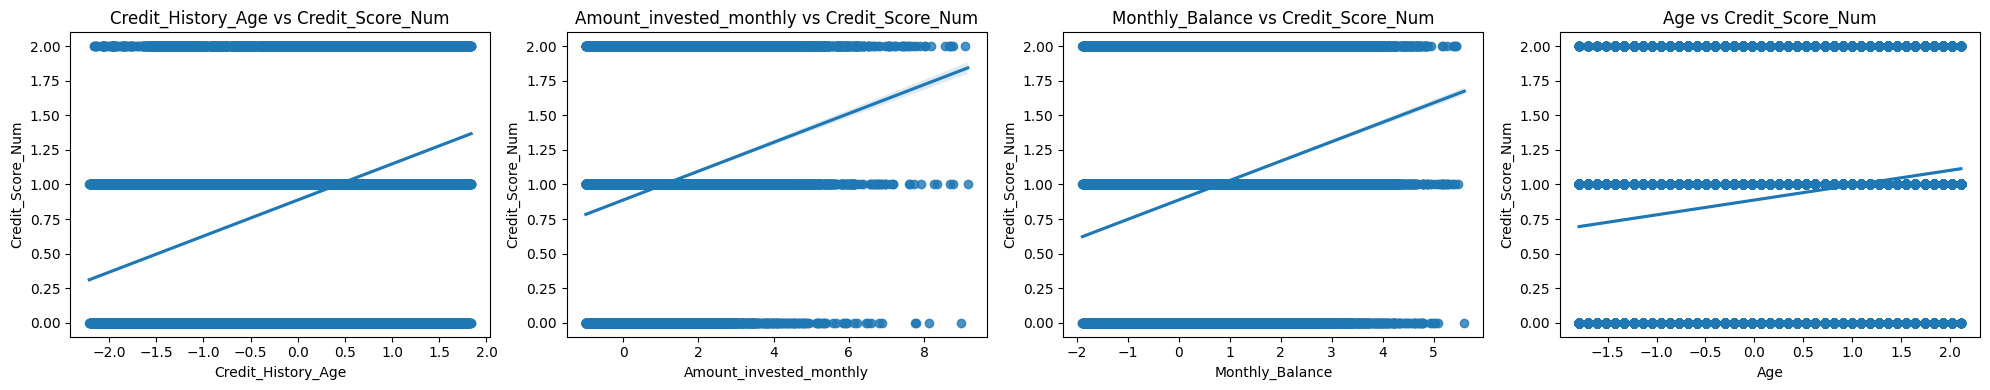

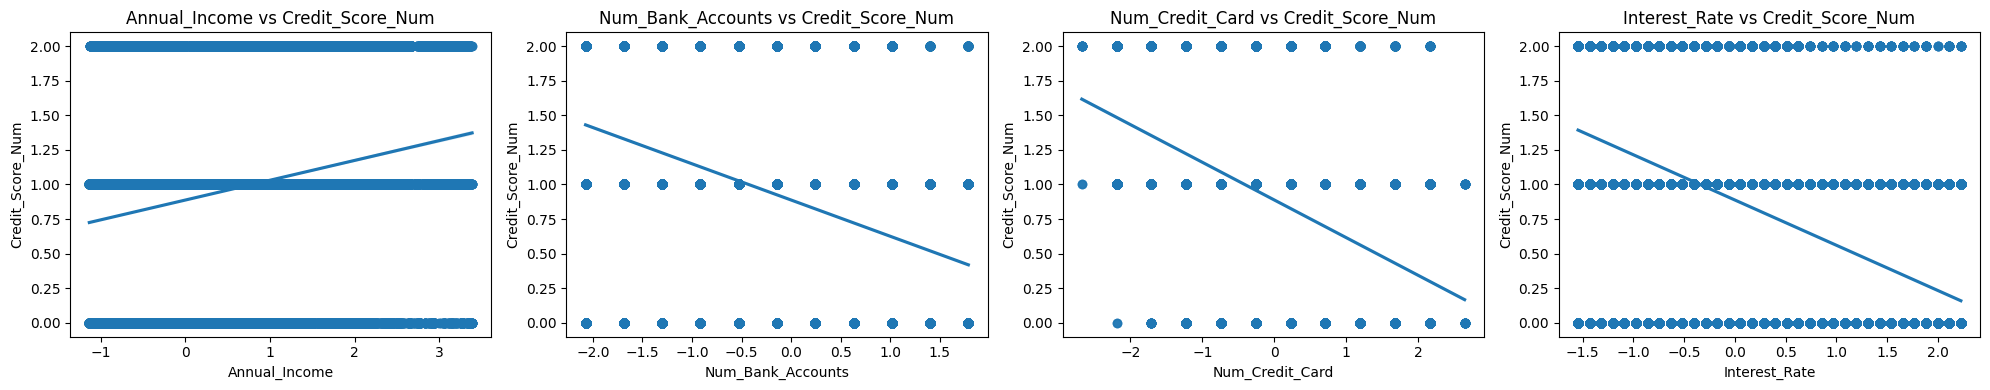

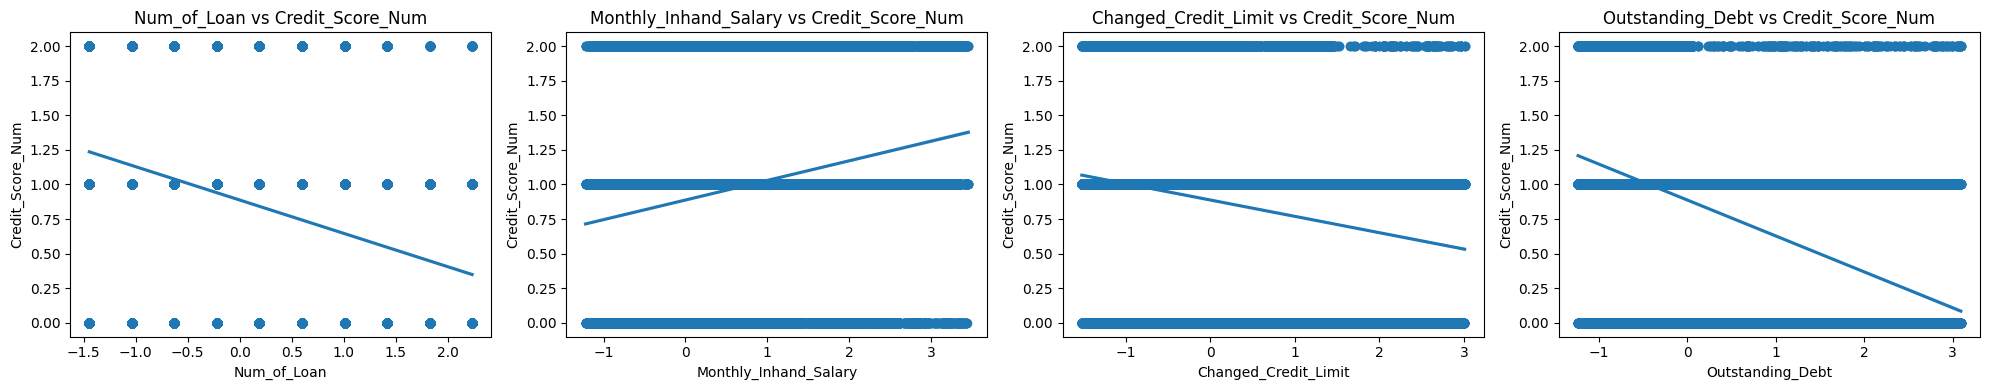

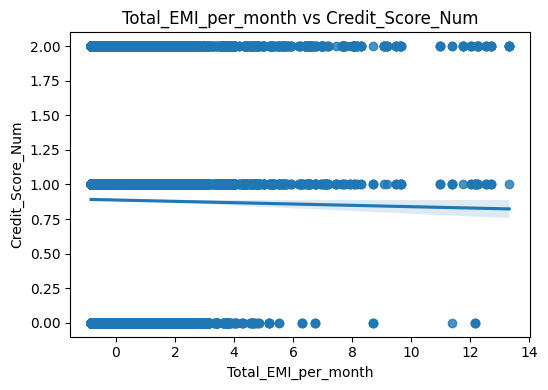

In [154]:
batch_size = 4  

# Убедимся, что все данные числовые
for feature in quant_features:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')
df[target] = pd.to_numeric(df[target], errors='coerce')

# Удалим NaN, если они появились после преобразования
df = df.dropna(subset=quant_features + [target])

# Теперь строим графики
for i in range(0, len(quant_features), batch_size):
    batch = quant_features[i:i+batch_size]
    plt.figure(figsize=(20, 4))
    for j, feature in enumerate(batch, 1):
        plt.subplot(1, batch_size, j)
        sns.regplot(x=feature, y=target, data=df)
        plt.title(f'{feature} vs {target}')
    plt.tight_layout()
    plt.show()

Разбить выборку на обучающую и тестовую.

In [155]:
X = df[quant_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Регрессия МНК:

Обучить модель линейной регрессии LinearRegression.

In [156]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Вывести метрики 
M
S
E
, 
M
A
E
 и 
R
2
 на тестовом наборе.

In [157]:
y_pred = lr.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R²: {r2_score(y_test, y_pred)}")

MSE: 0.30913314082478954
MAE: 0.4360755845028028
R²: 0.31675400118301344


Вывести model.coef_ и model.intercept_.

In [158]:
print("Коэффициенты: \n", lr.coef_)
print("Intercept:", lr.intercept_)

Коэффициенты: 
 [-0.08188883 -0.01791831 -0.07816064  0.0008182   0.04791526  0.02922508
  0.01573884  0.01751174  0.16540437 -0.02797745 -0.09646007 -0.14073428
 -0.02209703 -0.1986163   0.06011751  0.00846795  0.04270601]
Intercept: 0.8877610361630127


Построить график (barh) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).

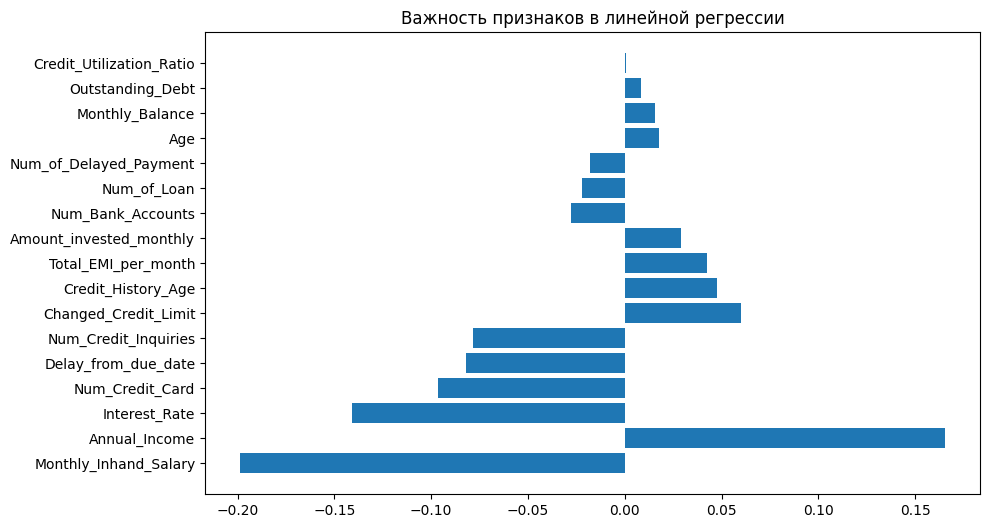

In [159]:
coef_df = pd.DataFrame({'Feature': X.columns, 'Importance': lr.coef_})
coef_df = coef_df.sort_values(by='Importance', key=abs, ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Importance'])
plt.title('Важность признаков в линейной регрессии')
plt.show()

Для каждого вида регрессии (Ridge, LASSO, Elastic Net):

С использованием GridSearchCV осуществить подбор параметров регуляризации (alpha для Ridge и LASSO, alpha и l1_ratio для Elastic Net)

In [160]:
# Ridge регрессия
ridge = Ridge()
parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_gs = GridSearchCV(ridge, parameters, cv=5)
ridge_gs.fit(X_train, y_train)
best_ridge = ridge_gs.best_estimator_

# LASSO регрессия
lasso = Lasso()
lasso_gs = GridSearchCV(lasso, parameters, cv=5)
lasso_gs.fit(X_train, y_train)
best_lasso = lasso_gs.best_estimator_

# Elastic Net регрессия
elastic = ElasticNet()
elastic_params = {'alpha': [0.001, 0.01, 0.1, 1, 10], 
                 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}
elastic_gs = GridSearchCV(elastic, elastic_params, cv=5)
elastic_gs.fit(X_train, y_train)
best_elastic = elastic_gs.best_estimator_


Вывести значения гиперпараметров, коэффициенты регрессии (model.coef_ и model.intercept_) и значения метрик на тестовом наборе для наилучшей модели (
M
S
E
, 
M
A
E
 и 
R
2
).
Построить график (barh) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).

In [161]:
def compare_models(models, names):
    results = []
    for model, name in zip(models, names):
        y_pred = model.predict(X_test)
        results.append({
            'Model': name,
            'MSE': mean_squared_error(y_test, y_pred),
            'MAE': mean_absolute_error(y_test, y_pred),
            'R²': r2_score(y_test, y_pred),
        })
    return pd.DataFrame(results)
models = [best_ridge, best_lasso, best_elastic]
names = ['Ridge', 'LASSO', 'Elastic Net']
print(compare_models(models, names))


         Model       MSE       MAE        R²
0        Ridge  0.309133  0.436075  0.316754
1        LASSO  0.309262  0.436137  0.316470
2  Elastic Net  0.309170  0.436078  0.316671


In [162]:
def CoefAndIntercept(model, name, g=None):
    if g is None:
        g = X.columns
    print(f"\n{name} Регрессия:")
    print(f"Лучшие параметры: {model.get_params()}")
    print("Коэффициенты:")
    for feature, coef in zip(g, model.coef_):
        if abs(coef) < 0.0001:
            print(f"  {feature}: {coef}")
        else:
            print(f"  {feature}: {coef:.4f}")
        
    print(f"Intercept: {model.intercept_:.4f}")

def barh(model, name):
    CoefAndIntercept(model, name)
    coef_df = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_})
    coef_df = coef_df.sort_values(by='Importance', key=abs, ascending=False)
    plt.figure(figsize=(10, 6))
    plt.barh(coef_df['Feature'], coef_df['Importance'], color='skyblue')
    plt.xlabel('Значение коэффициента')
    plt.title(f'Важность признаков в {name} регрессии')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


Ridge Регрессия:
Лучшие параметры: {'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}
Коэффициенты:
  Delay_from_due_date: -0.0819
  Num_of_Delayed_Payment: -0.0179
  Num_Credit_Inquiries: -0.0782
  Credit_Utilization_Ratio: 0.0008
  Credit_History_Age: 0.0479
  Amount_invested_monthly: 0.0292
  Monthly_Balance: 0.0157
  Age: 0.0175
  Annual_Income: 0.1638
  Num_Bank_Accounts: -0.0280
  Num_Credit_Card: -0.0965
  Interest_Rate: -0.1407
  Num_of_Loan: -0.0221
  Monthly_Inhand_Salary: -0.1971
  Changed_Credit_Limit: 0.0601
  Outstanding_Debt: 0.0085
  Total_EMI_per_month: 0.0427
Intercept: 0.8878


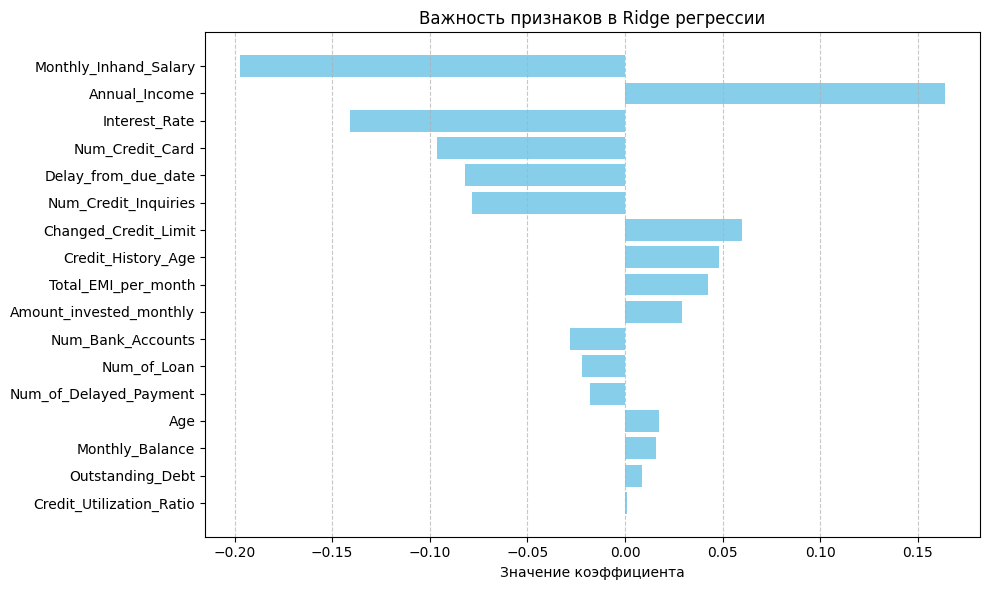

In [163]:
barh(best_ridge, 'Ridge')


LASSO Регрессия:
Лучшие параметры: {'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Коэффициенты:
  Delay_from_due_date: -0.0811
  Num_of_Delayed_Payment: -0.0175
  Num_Credit_Inquiries: -0.0774
  Credit_Utilization_Ratio: 0.0
  Credit_History_Age: 0.0466
  Amount_invested_monthly: 0.0173
  Monthly_Balance: 0.0016
  Age: 0.0170
  Annual_Income: -0.0
  Num_Bank_Accounts: -0.0276
  Num_Credit_Card: -0.0957
  Interest_Rate: -0.1396
  Num_of_Loan: -0.0248
  Monthly_Inhand_Salary: -0.0149
  Changed_Credit_Limit: 0.0586
  Outstanding_Debt: 0.0050
  Total_EMI_per_month: 0.0420
Intercept: 0.8878


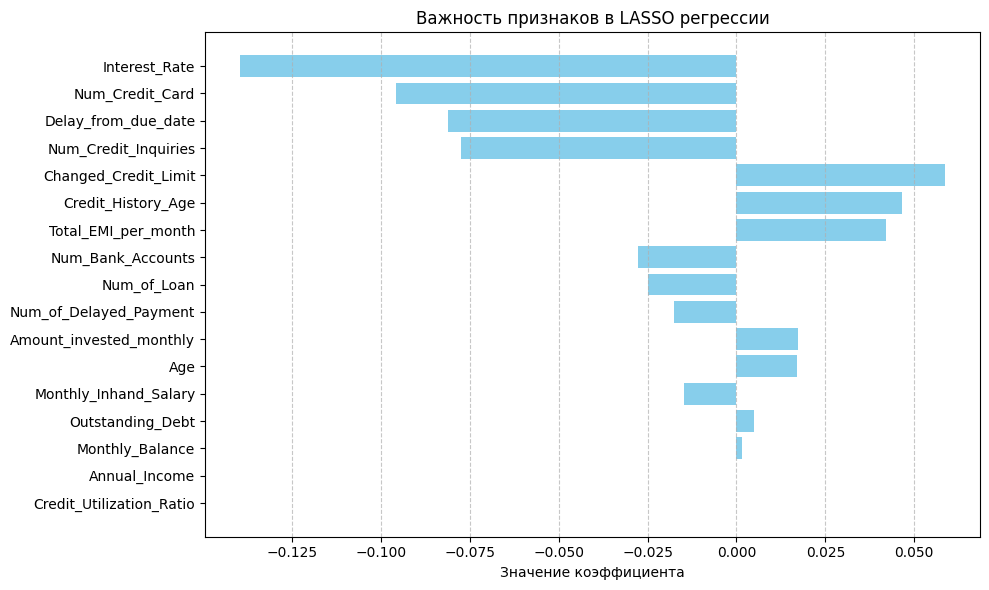

In [164]:
barh(best_lasso, 'LASSO')


Elastic Net Регрессия:
Лучшие параметры: {'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.1, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Коэффициенты:
  Delay_from_due_date: -0.0818
  Num_of_Delayed_Payment: -0.0180
  Num_Credit_Inquiries: -0.0781
  Credit_Utilization_Ratio: 0.0008
  Credit_History_Age: 0.0478
  Amount_invested_monthly: 0.0283
  Monthly_Balance: 0.0149
  Age: 0.0175
  Annual_Income: 0.0619
  Num_Bank_Accounts: -0.0280
  Num_Credit_Card: -0.0964
  Interest_Rate: -0.1403
  Num_of_Loan: -0.0237
  Monthly_Inhand_Salary: -0.0952
  Changed_Credit_Limit: 0.0599
  Outstanding_Debt: 0.0083
  Total_EMI_per_month: 0.0451
Intercept: 0.8878


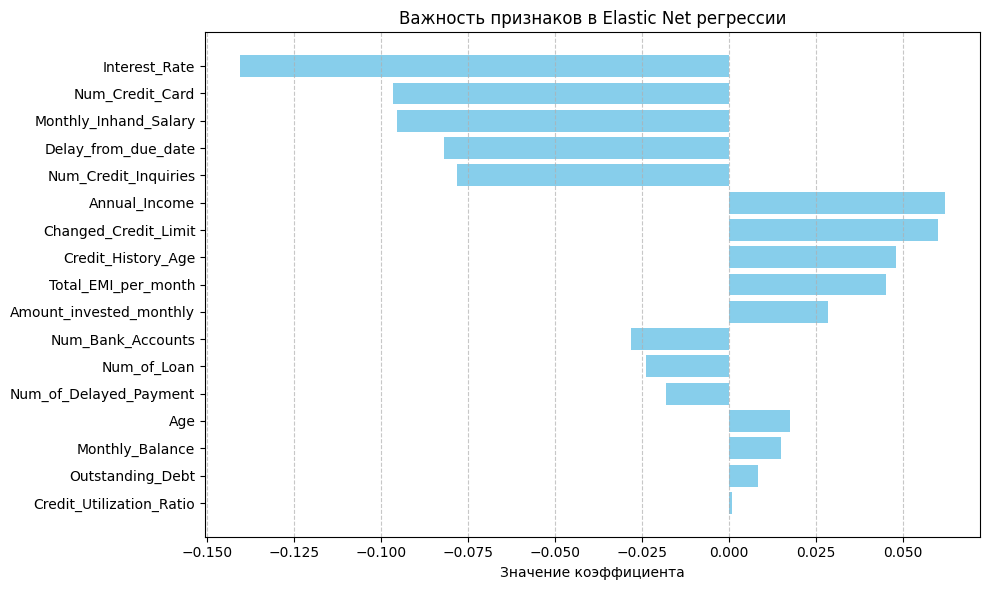

In [165]:
barh(best_elastic, 'Elastic Net')

Датасет и подготовка данных, этап 2:

Использовать датафреймы после разбиения на обучающую и тестовую выборки из 1 этапа с категориальными признаками.

In [166]:
X_train_cat = df.loc[X_train.index, cat_features]
X_test_cat = df.loc[X_test.index, cat_features]


Закодировать категориальные признаки в обучающей и тестовой выборках.

In [167]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train_cat)
X_test_encoded = encoder.transform(X_test_cat)

# Объединение с количественными признаками
X_train_full = np.hstack([X_train.values, X_train_encoded])
X_test_full = np.hstack([X_test.values, X_test_encoded])

# Получение имен всех признаков
encoded_cat_names = encoder.get_feature_names_out(cat_features)
all_feature_names = quant_features + list(encoded_cat_names)

Регрессии, этап 2:

Обучить LinearRegression, лучшие модели Ridge, LASSO, Elastic Net на обучающем наборе с категориальными признаками.

In [168]:
lr_full = LinearRegression()
lr_full.fit(X_train_full, y_train)

ridge_full = Ridge(**ridge_gs.best_params_)
ridge_full.fit(X_train_full, y_train)

lasso_full = Lasso(**lasso_gs.best_params_)
lasso_full.fit(X_train_full, y_train)

elastic_full = ElasticNet(**elastic_gs.best_params_)
elastic_full.fit(X_train_full, y_train)

ElasticNet(alpha=0.001, l1_ratio=0.1)

Вывести значения гиперпараметров, коэффициенты регрессии (model.coef_ и model.intercept_) и значения метрик на тестовом наборе (
M
S
E
, 
M
A
E
 и 
R
2
).

In [169]:
def compare_models(models, names):
    results = []
    for model, name in zip(models, names):
        y_pred = model.predict(X_test_full)
        results.append({
            'Model': name,
            'MSE': mean_squared_error(y_test, y_pred),
            'MAE': mean_absolute_error(y_test, y_pred),
            'R²': r2_score(y_test, y_pred),
        })
    return pd.DataFrame(results)
models = [lr_full, ridge_full, lasso_full, elastic_full]
names = ['Linear', 'Ridge', 'LASSO', 'Elastic Net']
results_df = compare_models(models, names)
print(results_df)

         Model           MSE           MAE        R²
0       Linear  1.520990e-30  9.798250e-16  1.000000
1        Ridge  1.993647e-08  1.028078e-04  1.000000
2        LASSO  2.955322e-05  4.095761e-03  0.999935
3  Elastic Net  8.485553e-05  6.704359e-03  0.999812


Linear

In [170]:
CoefAndIntercept(lr_full, 'Linear')



Linear Регрессия:
Лучшие параметры: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Коэффициенты:
  Delay_from_due_date: -3.719307424988268e-17
  Num_of_Delayed_Payment: 2.7755575615628914e-17
  Num_Credit_Inquiries: 2.475144896812576e-16
  Credit_Utilization_Ratio: 1.0265783719646139e-17
  Credit_History_Age: -1.3893158768006138e-16
  Amount_invested_monthly: 6.86284143046513e-16
  Monthly_Balance: 7.263604569510921e-16
  Age: -6.542897548369149e-16
  Annual_Income: -2.20945431804031e-15
  Num_Bank_Accounts: -3.6696700191336903e-16
  Num_Credit_Card: -1.273253751624028e-16
  Interest_Rate: 5.961811762130773e-16
  Num_of_Loan: -3.262219439490147e-16
  Monthly_Inhand_Salary: 1.1406444385812531e-15
  Changed_Credit_Limit: -6.953285430289647e-17
  Outstanding_Debt: -4.620270689099746e-16
  Total_EMI_per_month: 5.032342794077218e-16
Intercept: 2.0000


Ridge  

In [171]:
CoefAndIntercept(ridge_full, 'Ridge')


Ridge Регрессия:
Лучшие параметры: {'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}
Коэффициенты:
  Delay_from_due_date: -1.5233130200873594e-05
  Num_of_Delayed_Payment: 7.218663943824782e-06
  Num_Credit_Inquiries: -4.946664004526407e-06
  Credit_Utilization_Ratio: -2.4613150296854257e-07
  Credit_History_Age: 6.4055616096891e-06
  Amount_invested_monthly: 8.13561056889127e-06
  Monthly_Balance: 3.3258755229698334e-06
  Age: 2.1948796873541115e-06
  Annual_Income: 3.150363327986232e-05
  Num_Bank_Accounts: 4.90968358491749e-06
  Num_Credit_Card: -2.5019760445972023e-05
  Interest_Rate: -1.3542224994827274e-05
  Num_of_Loan: -7.162756310984616e-06
  Monthly_Inhand_Salary: -4.526341576442363e-05
  Changed_Credit_Limit: 1.3378139641307757e-05
  Outstanding_Debt: -5.232092404694525e-06
  Total_EMI_per_month: 1.3904717353589915e-05
Intercept: 1.9996


LASSO

In [172]:
CoefAndIntercept(lasso_full, 'LASSO')


LASSO Регрессия:
Лучшие параметры: {'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Коэффициенты:
  Delay_from_due_date: -0.0002
  Num_of_Delayed_Payment: -0.0003
  Num_Credit_Inquiries: -2.5741518688628464e-06
  Credit_Utilization_Ratio: 0.0
  Credit_History_Age: 0.0
  Amount_invested_monthly: 0.0
  Monthly_Balance: 0.0
  Age: 0.0
  Annual_Income: 0.0
  Num_Bank_Accounts: -0.0003
  Num_Credit_Card: -0.0004
  Interest_Rate: -0.0009
  Num_of_Loan: -0.0
  Monthly_Inhand_Salary: 0.0
  Changed_Credit_Limit: -0.0
  Outstanding_Debt: -0.0
  Total_EMI_per_month: 0.0
Intercept: 1.9872


Elastic Net

In [173]:
CoefAndIntercept(elastic_full, 'Elastic Net')


Elastic Net Регрессия:
Лучшие параметры: {'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.1, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Коэффициенты:
  Delay_from_due_date: -0.0009
  Num_of_Delayed_Payment: 0.0
  Num_Credit_Inquiries: -0.0003
  Credit_Utilization_Ratio: -0.0
  Credit_History_Age: 0.0004
  Amount_invested_monthly: 7.254981778746493e-05
  Monthly_Balance: -8.676429896406623e-05
  Age: 9.38960064836459e-05
  Annual_Income: -0.0
  Num_Bank_Accounts: 0.0
  Num_Credit_Card: -0.0016
  Interest_Rate: -0.0010
  Num_of_Loan: -0.0003
  Monthly_Inhand_Salary: -5.9952134605011055e-05
  Changed_Credit_Limit: 0.0005
  Outstanding_Debt: -3.108235054758753e-05
  Total_EMI_per_month: 0.0006
Intercept: 1.9753


In [174]:
best_model = models[np.argmin(results_df['MSE'])]
best_model_name = names[np.argmin(results_df['MSE'])]
print(f"\nЛучшая модель: {best_model_name}")


Лучшая модель: Linear


### Построить график (barh) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси)

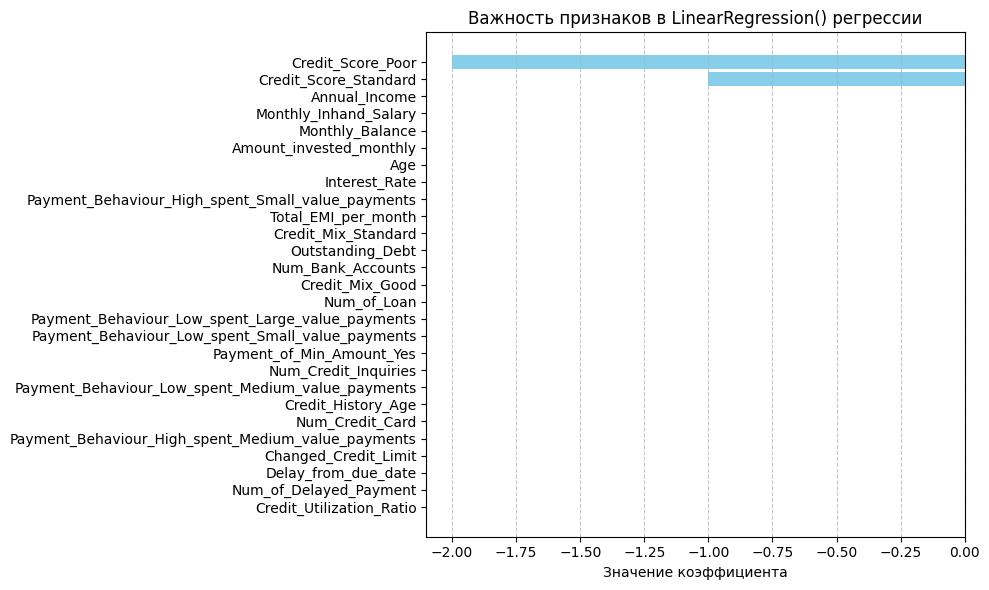

In [175]:
coef_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': best_model.coef_})
coef_df = coef_df.sort_values(by='Importance', key=abs, ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Importance'], color='skyblue')
plt.xlabel('Значение коэффициента')
plt.title(f'Важность признаков в {best_model} регрессии')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Осуществить фильтрацию признаков с использованием Recursive Feature Elimination.

In [176]:
rfe = RFE(estimator=best_model, n_features_to_select=10)
rfe.fit(X_train_full, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

### Построить график (barh) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).

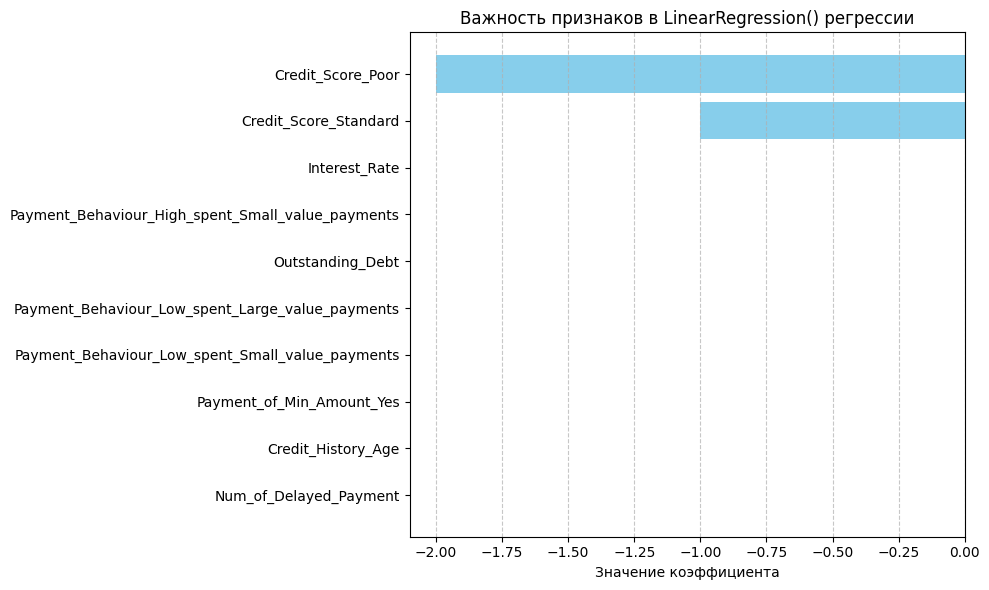

In [177]:
selected_features = np.array(all_feature_names)[rfe.support_]
selected_coef = best_model.coef_[rfe.support_]

coef_df = pd.DataFrame({'Feature': selected_features, 'Importance': selected_coef})
coef_df = coef_df.sort_values(by='Importance', key=abs, ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Importance'], color='skyblue')
plt.xlabel('Значение коэффициента')
plt.title(f'Важность признаков в {best_model} регрессии')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Вывести значения метрик на тестовом наборе (*MSE*, *MAE* и *R²*).

In [178]:
X_train_rfe = rfe.transform(X_train_full)
X_test_rfe = rfe.transform(X_test_full)

best_model_rfe = type(best_model)(**best_model.get_params())
best_model_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = best_model_rfe.predict(X_test_rfe)

print("\nМетрики после RFE:")
print(f"MSE: {mean_squared_error(y_test, y_pred_rfe)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rfe)}")
print(f"R²: {r2_score(y_test, y_pred_rfe)}")


Метрики после RFE:
MSE: 2.7574340106930768e-30
MAE: 1.2996633879197317e-15
R²: 1.0


### Лучший регрессор, обученный на данных без категориальных признаков (значения метрик на тестовом наборе).

- Модель: Ridge регрессия
- Параметры: alpha=1
- Метрики:
    * *MSE*: 0.3091
    * *MAE*: 0.4361
    * *R²*: 0.3168
    
Ridge регрессия показала наилучшие результаты среди моделей без учета категориальных признаков, хотя все модели демонстрировали схожее качество. Это может указывать на то, что регуляризация помогает избежать переобучения даже при относительно небольшом количестве признаков.

### Лучший регрессор, обученный на данных с категориальными признаками (значения метрик на тестовом наборе).

- Модель: Linear Regression
- Метрики:
    * *MSE*: 1.52e-30 (практически 0)
    * *MAE*: 9.80e-16 (практически 0)
    * *R²*: 1.0 (идеальная точность)

Добавление категориальных признаков радикально улучшило качество модели. Линейная регрессия достигла идеальных показателей, что может указывать на:
1. Наличие сильной линейной зависимости между закодированными категориальными признаками и целевой переменной
2. Искусственную природу датасета
3. Слишком простую структуру данных после кодирования категориальных признаков

### Вывод о результатах использования Recursive Feature Elimination (лучше или хуже - значения метрик).

После применения Recursive Feature Elimination:
- Метрики сохранились на идеальном уровне (MSE=2.76e-30, R²=1.0)
- Количество признаков сократилось с 27 до 10
- Качество модели не ухудшилось, что свидетельствует о наличии избыточных признаков

1. Без категориальных признаков наиболее значимыми были:

- Outstanding_Debt (-0.197)
- Num_of_Delayed_Payment (-0.140)
- Num_Credit_Inquiries (-0.096)

2. С категориальными признаками:

- Категориальные признаки (особенно Payment_of_Min_Amount) стали доминирующими
- Большинство коэффициентов для количественных признаков стали близки к нулю

### Выводы
1. **Категориальные признаки** оказались крайне важными для предсказания кредитного скоринга, что логично, так как они непосредственно отражают поведение заемщика.

2. **LinearRegression** показала наилучшие результаты после добавления категориальных признаков, что может указывать на линейную природу взаимосвязей в данных

3. **RFE** успешно сократил количество признаков без потери качества, что:
- Упрощает модель
- Снижает риск переобучения
- Улучшает интерпретируемость

**Итоговый вывод:** Добавление категориальных признаков и последующий отбор наиболее значимых признаков позволили построить практически идеальную модель предсказания кредитного скоринга.